In [1]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 10.1 생물학적 뉴런에서 인공 뉴런까지

* 인공 신경망(ANN, Aritificial Neural Networks)은 1943년 신경생리학자 Warren McCulloch과 수학자 Walter Pitts가 'A Logical Calculus of Ideas Immanent In Nervous Activity' 처은 소개했으며, 명제 논리(propositional logic)를 사용해 동물 뇌의 생물학적 뉴런이 복잡한 계산을 위해 어떻게 상호작용하는지에 대해 간단한 계산 모델을 제시했다.
* 1960년대까지는 이렇게 등장한 인공 신경망을 통해 사람들은 지능을 가진 기계와 대화를 나눌 수 있을 것이라고 생각했다. 하지만 아래 그림(출처: beamandrew's blog)처럼 사람들의 기대와는 달리 인공 신경망으로 XOR문제를 해결할 수 없게 되었고, 1990년 대에는 SVM과 성능이 좋은 다른 머신러닝 알고리즘들이 나오게 되면서 인공 신경망은 암흑기로 접어 들게 되었다.
* 2000년 대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었다. 이렇게 인공 신경망(딥러닝)이 다시 주목받게 된 계기는 다음과 같은 것들이 있다.

 - 빅 데이터 시대인 요즘 신경망을 학습시키기 위한 데이터가 엄청나게 많아 졌다.
 - 신경망은 다른 머신러닝 알고리즘보다 규모가 크고 복잡한 문제에서 성능이 좋다. 
 - 1990년대 이후 크게 발전된 컴퓨터 하드웨어 성능과 Matrix연산에 고성능인 GPU로 인해 상대적으로  짧은 시간 안에 대규모의 신경망을 학습시킬 수 있게 되었다.
<img src = 'images/10_images/history.jpg'>

## 10.1.1 생물학적 뉴런

* 인공 뉴런에 관해 이야기하기 전에 생물학적 뉴런을 살펴봐야한다. 이 세포는 핵을 포함하는 세포체와 복잡한 구성 요소로 이루어져 있다.
* 생물학적 뉴런은 활동 전위(Action Potential, AP) 또는 간단히 신호(Signal)라고 부르는 짧은 전기 자극을 만든다. 이 신호는 축삭돌기를 따라 이동하여 시냅스가 신경전달물질(Neurotransmitter)이라는 화학적 신호를 발생하게 한다.
* 뉴런은 일천 분의 몇 초 동안 충분한 양의 신경전달물질을 받았을 때 자제적인 신호를 발생한다.
<img src = 'images/10_images/neuron.png'>

* 그리고 이 뉴런은 보통 다른 뉴런 네트워크 수천 개와 연결되어, 단순한 뉴런으로 구성된 거대한 네트워크가 매우 복잡한 계산을 수행할 수 있다.

## 10.1.2 뉴런을 사용한 논리 연산

* 메컬러와 피츠가 생물학적 뉴런에서 착안한 매우 단순한 신경망 모델을 제안했는데, 이것이 나중에 인공 뉴런(Artificial Neuron)이 되었다.
* 이 모델은 하나 이상의 이진(On / Off) 입력과 이진 출력 하나를 가진다.
* 인공 뉴런은 단순히 입력이 일정 개수만큼 활성화되었을 때 출력을 내보낸다.

<img src = 'images/10_images/mlst_1003.png'>

* 이런 간단한 모델로 인공 뉴런의 네트워크를 만들어 어떤 논리 명제도 계산할 수 있다.

 1. 항등함수 : 뉴런 A가 활성화 되면 뉴런 C도 활성화 된다.
 2. 논리곱 연산 : 뉴런 A, B가 모두 활성화될 때만 뉴런 C가 활성화된다.
 3. 논리합 연산 : 뉴런 A 와 B 중 하나가 활성화되면 뉴런 C가 활성화된다.
 4. 뉴런의 활성화를 억제할 수 있다고 가정 : 뉴런 A가 활성화, 뉴런 B가 비활성화될 때 뉴런 C가 활성화된다.

## 10.1.3 퍼셉트론

* 퍼셉트론(Perceptron)은 가장 간단한 인공 신경망 구조 중 하나로 1957년에 프랑크 로젠블라트(Frank Rosenblatt)가 제안했다.
* 퍼셉트론은 TLU(Threshold Logic Unit), LTU(Linear Threshold Unit)라고 불리는 조금 다른 형태의 인공 뉴런을 기반으로 한다.
 - TLU : 입력의 가중치 합을 계산한 다음 계단 함수를 적용하는 인공 뉴런
* 입력과 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치(W, Weight)와 연관되어 있어, 입력의 가중치 합을 계산한뒤 계산된 합에 계단 함수(Step Function)를 적용하여 결과를 출력한다.

$$
\begin{align*}
h_w(\mathbf{X}) &amp;= \text{step}(z) \\ &amp;= \text{step}(\mathbf{W}^{T} \cdot \mathbf{X})
\end{align*}
$$

<img src = 'images/10_images/perceptron02.png'>

* 헤비사이드 계단 함수(Heaviside Step Function) : 퍼셉트론에서 가장 널리 사용되는 계단 함수, 부호 함수(Sign Function)를 대신 사용하기도 한다.
$$
\text{heaviside}(z)=\begin{cases} 0 \text{  (}z < 0)  \\ 1 \text{  (}z ≥ 0) \end{cases}, \quad \text{sgn}(z)= \begin{cases} -1 \text{  (}z < 0)\\  0 \text{ (}z = 0)\\ +1 \text{  (}z > 0)\end{cases}
$$

* 위의 그림에서 처럼, 하나의 TLU는 입력과 가중치의 선형결합인 $z$가 $z \ge 0$ 이면 양성 클래스, $z < 0$이면 음성 클래스를 출력하게 하는 선형 이진 분류(linear binary classification)에 적용할 수 있다. 이러한 TLU를 학습시킨다는 것은 분류를 잘할 수 있는 최적의 매개변수 $w_1, w_2, \dots, w_n$을 찾는다는 뜻이다.

* 퍼셉트론은 층이 하나뿐인 TLU로 구성된다. 각 TLU은 모든 입력에 연결되어 있다.
* 완전 연결 층(Fully Conected Layer) / 밀집층(Dense Layer) : 한 층에 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때
* 입력 뉴런(Input Neuron) : 퍼셉트론의 입력
* 입력층(Input Layer)는 모두 입력 뉴런으로 구성, 보통 거기에 편향 특성이 더해진다.
* 아래의 그림은 위의 TLU를 세 개로 구성한 퍼셉트론에 편향($x_0=1$)을 추가한 것이다. 이 퍼셉트론은 샘플 세 개의 클래스(레이블)로 분류할 수 있는 Multioutput Classifier이다.
<img src = 'images/10_images/multi-tlu.png'>

* 퍼셉트론 학습
 - 프랑크 로젠블라트가 제안한 퍼셉트론의 훈련 알고리즘은 헤브의 규칙(Hebb's rule)에서 영감을 받았다.
 -  Donald Hebb는 1949년에 출간한 책 'The Organization of Behavior'에서 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 강해진다고 주장했다. 즉, 두 뉴런이 동일한 출력을 낼 때마다 이 둘 사이의 연결 가중치가 증가하며 이러한 규칙을 헤브의 규칙 또는 헤브 학습(Hebbian Learning)이라고 한다.
 - 퍼셉트론은 네트워크가 만드는 에러를 반영하도록 학습되며 잘못된 출력을 만드는 연결은 올바른 출력을 만들 수 있도록 가중치를 조정한다.
 - 한번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어지고, 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 연결된 가중치를 강화시킨다. 규칙은 다음과 같다.
$$
w_{i,j}^{\text{(next step)}} = w_{i,j} + \eta \left( y_j - \hat{y}_j \right) x_i
$$
   -  $w_{i,j}$ : $i$-번째 입력 뉴런과 $j$-번째 출력 뉴런 사이를 연결하는 가중치
   -  $x_i$ : 현재 학습 데이터 샘플의 $i$-번째 뉴런의 입력값
   -  $\hat{y}_j$ : 현재 학습 데이터 샘플의 $j$-번째 출력 뉴런의 출력값
   -  $y_j$ : 현재 학습 데이터 샘플의 $j$-번째 출력 뉴런의 실제값
   -  $\eta$ : 학습률, learning rate
   
* 각 출력 뉴런의 결정 경계는 선형이므로 퍼셉트론도 복잡한 패턴을 학습하지 못한다. 하지만 로젠블라트는 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다는 것을 증명했다.
* 이를 퍼셉트론 수렴 이론(Perceptron Convergence Theorem)이라고 한다.

In [2]:
#사이킷런의 Perceptron 클래스
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

Perceptron(max_iter=100, random_state=42)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


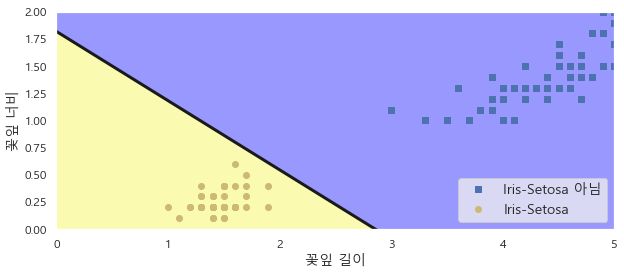

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

* 1969년 마빈 민스키(Marvin Minsky)와 시모어 페퍼트(Seymour Papert)는 퍼셉트론이 선형 분류기이기 때문에 배타적인 논리합 XOR 분류 문제를 해결할 수 없다는 결정적인 문제점을 지적했다.

<img src = 'images/10_images/or-vs-xor.png'>

* 하지만 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있다는 사실이 밝혀지고, 이런 인공 신경망을 다층 퍼셉트론(Multi-Layer Perceptron, MLP)라고 한다.
<img src = 'images/10_images/xor_gate3.png'>
<img src = 'images/10_images/xor_gate.png'>

## 10.1.4 다층 퍼셉트론과 역전파

* 다층 퍼셉트론은 입력층(Input Layer) 하나와 은닉층(Hidden Layer)이라 불리는 하나 이상의 TLU층과 마지막 출력층(Output Layer)로 구성된다.
* 입력층과 가까운 층을 보통 하위 층(Lower Layer)라 부르고, 출력에 가까운 층을 상위층(Upper Layer)이라고 부른다.
* 은닉층을 여러 개 쌓아 올린 인공 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 한다.
* 이를 학습하여 모델을 만드는 것을 딥러닝(Deep-Learning)이라고 한다.
<img src = 'images/10_images/mlp.png'>

 - 피드포워드 신경망(Feedfoward Neural Network, FNN) : 입력에서 출력 한 방향으로만 흐르는 구조

* MLP를 통해 XOR문제를 해결했지만, 층이 깊어질수록 증가하는 가중치 매개변수의 수로 인해 다층 퍼셉트론을 학습시키기에는 오랜 시간이 걸리는 문제가 발생
* 1986년 데이비드 루멜하트(David Rumelhart), 제프리 힌턴, 로날드 윌리엄스(Ronald Williams)가 역전파(Backpropagation) 훈련 알고리즘을 소개하면서, 계산량을 획기적으로 줄일 수 있었다.
* 역전파 알고리즘
 1. 각 학습데이터 샘플을 네트워크에 입력으로 넣어주고 출력층까지 각 층의 뉴런마다 출력을 계산한다. 이를 순전파(Foward propagation)이라고 한다.
 2. 그 다음 네트워크의 마지막 출력층에 대한 결과(예측값)와 실제값과의 차이, 즉 오차(Error)를 계산하는데, 손실함수(Loss function)를 이용하여 계산한다.
 3. 그리고 이 오차를 역방향으로 흘러 보내면서, 각  출력 뉴런의 오차에 마지막 입력 뉴런이 얼마나 기여했는지 측정한다. 즉, 각 뉴런의 입력값에 대한 손실함수의 편미분, 그래디언트(Gradient)를 계산하는 것을 말한다. (Backpropagation)
 4. 3번과 같은 방법을 입력층에 도달할 때까지 반복해서 역방향으로 흘러 보낸다.
 5. 마지막으로, 계산한 그래디언트를 네트워크의 모든 가중치 매개변수에 반영해주는 경사 하강법 단계를 수행한다.
 
    - 에포크(Epoch) : 한 번에 하나의 미니배치씩 진행하여 전체 훈련 세트를 처리하는 각 반복을 뜻한다.
    - 은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요하다

* 활성화 함수(Activation Function)

- 역전파 알고리즘이 잘 동작하기 위해서 다층 퍼셉트론의 구조에 변화를 주었는데, 그것이 계단 함수를 로지스틱(시그모이드) 함수로 바꾼 것이다.
- 왜냐하면 계단 함수에는 수평선밖에 없으니 계산할 그레디언트가 없기 때문이다.
- 활성화 함수로는 다양한 활성화 함수를 사용할 수 있다.

<img src = 'images/10_images/activation02.png'>

   - 하이퍼볼릭 탄젠트 함수(쌍곡 탄젠트 함수, tanh) : 로지스틱 함수처럼 이 활성화 함수도 S자 모양이고 연속적이며 미분 가능 / 출력 범위가 -1 ~ 1 사이 / 이 범위는 훈련 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있어서 종종 빠르게 수렴되도록 도와준다. 
   - ReLU 함수 : 연속적이지만, z = 0에서 미분 가능하지 않다 / z < 0 일 경우 도함수는 0 / 실제로 잘 작동하고 계산 속도가 빠르다는 장점이 있어 기본 활성화 함수가 되었다. / 출력에 최댓값이 없다는 점이 경사 하강법에 있는 일부 문제를 완화해준다.

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

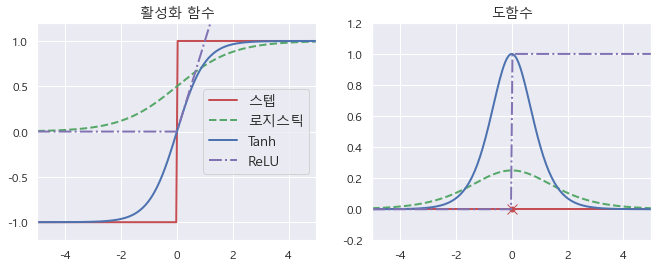

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

* 소프트맥스(Softmax) 함수
 - 주로 출력층에서 사용하는 활성화 함수로, 식은 다음과 같다.
 $$
\hat{y}_k = \frac{ \text{exp} \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)}{\sum_{j=1}^{K}{\text{exp} \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)}} \quad (K=\text{# of class})
$$
<img src = 'images/10_images/softmax.png'>

## 10.1.5 회귀를 위한 다층 퍼셉트론

* 값하나를 예측하는데 출력 뉴런이 하나만 필요하다. 이 뉴런의 출력이 예측된 값이다.
* 다변량 회귀(Miltivariate Regression)에서는 출력 차원마다 출력 뉴런이 하나씩 필요하다.
* 일반적으로 회귀용 다층 퍼셉트론을 만들 때 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값이 출력되도록 한다. 하지만 출력이 항상 양수여야 한다면 출력층에 ReLU 활성화 함수를 사용할 수 있다. 이처럼 원하는 출력값에 맞춰서 활성화 함수를 설정할 수 있다.
* 훈련에 사용하는 손실 함수는 전형적으로 평균 제곱 오차. 하지만 훈련 세트에 이상치가 많다면 대신 평균 절댓값 오차를 사용할 수 있다. 또는 이 둘을 조합한 후버(Huber)손실을 사용할 수 있다.

* 회귀 MLP의 전형적인 구조
 - 입력 뉴런 수 : 특성마다 하나
 - 은닉층 수 : 문제에 따라 다르다. 일반적으로 1 ~ 5
 - 은닉층의 뉴런 수 : 문제에 따라 다르다. 일반적으로 10 ~ 100
 - 출력 뉴런 수 : 예측 차원마다 하나
 - 은닉층의 활성화 함수 : ReLU 또는 SELU
 - 출력층의 활성화 함수 : 없음 또는 ReLU/softmax(출력이 양수) 또는 logistic/tanh(출력을 특정 범위로 제한할 때)
 - 손실 함수 : MES 또는 MAE/Huber(이상치가 있다면)

# 10.1.6 분류를 위한 다층 퍼셉트론

* 이진 분류 문제에서는 로지스틱 활성화 함수를 가진 하나의 출력 뉴런만 필요
 - 출력은 0 ~ 1 사이의 실수
 - 양성 클래스에 대한 예측 확률로 해석할 수 있다.
 - 음성 클래스에 대한 예측 확률은 1에서 양성 클래스의 예측 확률을 뺀 값
* 다층 퍼셉트론은 다중 레이블 이진 분류(multilabel Binary Classification) 문제를 쉽게 처리할 수 있다.
 - 각 샘플이 3개 이상의 클래스 중 한 클래스에만 속할수 있다면 쿨래스마다 하나의 출력 뉴런이 필요
 - 출력층에는 소프트맥스 활성화 함수를 사용해야 한다.
 - 확률 분포 예측을 위해 손실 함수에는 크로스 엔트로피 손실 함수(Cross-Entropy Loss, 로그 손실)를 사용한다.

* 분류 MLP의 전형적인 구조
|하이퍼 파라미터|이진 분류|다중 레이블 분류|다중 분류|
|------|------|------|------|
|입력층과 은닉층     | 회귀와 동일    | 회귀와 동일     | 회귀와 동일 |
|출력 뉴런 수        | 1개            | 레이블마다 1개  | 클래스마다 1개|
|출력층의 활성화 함수| 로지스틱 함수  | 로지스틱 함수   | 소프트맥스 함수|
|손실 함수           | 크로스 엔트로피| 크로스 엔트로피 | 크로스 엔트로피|

# 10.2 케라스로 다층 퍼셉트론 구현하기

In [15]:
#텐서플로우랑 케라스 임포트하기
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


## 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [17]:
#케라스 사용하여 데이터셋 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
#28 X 28크기의 배열

In [21]:
#픽셀 강도가 정수(0~255)로 표현
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [22]:
#전체 훈련 세트를 검증 세트와 훈련 세트로 나누고,
#경사 하강법으로 신경망을 훈련하기 위한 입력 특성의 스케일 0~1 사이 범위로 조정하기
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

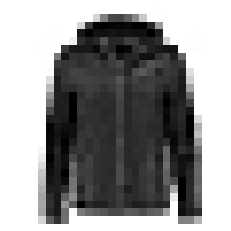

In [23]:
#matplotlib의 imshow() 함수와 binary 컬러맵을 사용해 이미지 출력
plt.imshow(X_train[0], cmap='binary')
plt.axis("off")
plt.show()

In [24]:
#레이블은 0~9까지 정수로 표현된 클래스 아이디
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

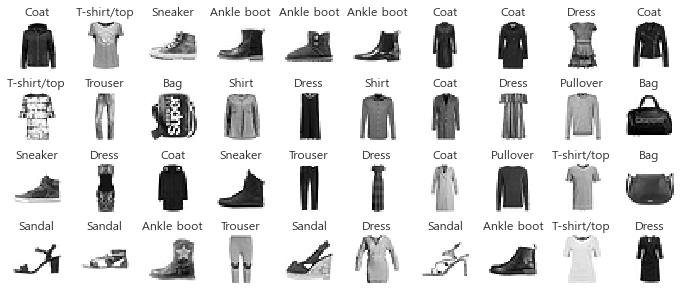

In [31]:
#샘플 이미지 출력
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace = 0.2, hspace=0.5)
plt.show()

* 시퀀셜 API를 사용하여 모델 만들기
 1. Sequential 모델 만들기. 가장 간단한 케라스의 신경망 모델
 2. Flatten 층은 입력 이미지를 1D배열로 변환
 3. 뉴런 300개를 가진 Dense 은닉층 추가 / ReLU 활성화 함수 사용 / Dense층마다 각자 가중치 행렬 관리
 4. 뉴런 100개를 가진 Dense 은닉층 추가
 5. 마지막으로 뉴런 10개를 가진 Dense 출력층 추가 / Softmax활성화 함수 사용

In [34]:
#두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
#층의 리스트를 전달할 수도 있다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [38]:
#summary() 메서드는 모델에 있는 모든 층을 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.layers

In [42]:
hidden1 = model.layers[1]
hidden1.name

'dense_8'

In [44]:
model.get_layer('dense_8') is hidden1

True

In [52]:
#get_weight() / set_weights() 메서드를 사용해 접근할 수 있다.
weights, biases = hidden1.get_weights()
print(weights, end = "\n\n")
print(weights.shape, end = "\n\n")
print(biases.shape, end = "\n\n")
print(biases)

[[-0.05207059  0.003291    0.06486709 ... -0.0137484   0.00902148
   0.06312418]
 [ 0.06132056 -0.06125566 -0.00895299 ... -0.06883114  0.03675523
  -0.06375062]
 [-0.0222708  -0.01953053 -0.04256049 ... -0.02442167 -0.01449105
  -0.02061009]
 ...
 [ 0.05731934 -0.02246214 -0.06358982 ...  0.04602847 -0.04329095
  -0.05852254]
 [-0.02641159  0.01150537  0.02243438 ... -0.04857169 -0.04977864
  -0.05337812]
 [-0.01150181 -0.06389136 -0.06321312 ... -0.07172181 -0.03851101
   0.02834268]]

(784, 300)

(300,)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

* 모델 컴파일
 - 레이블이 정수 하나로 이루어져 있고, 클래스가 배타적이므로 sparse_categorical_crossentropy 손실을 사용
 - 샘플마다 클래스별 타킷 확률을 가지고 있다면 categorical_crossentropy 손실을 사용
 - 이진 분류를 수행한다면 출력층에 softmax 함수 대신 sigmoid 함수를 사용하고 binary_crossentropy를 사용
 - 옵티마이저에 sgd를 지정하면 기본 확률적 경사 하강법을 사용하여 모델을 훈련
 - 분류기이므로 훈련과 평가 시에 정확도를 측정하기 위해 accuracy로 지정

In [54]:
#compile() 메서드를 호출하여 사용할 손실 함수와 옵티마이저(Optimizer)를 지정
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

* 모델 훈련과 평가
 - 훈련 세트가 편중되어 있다면 class_weight 매개변수를 지정
 - 샘플별 가중치를 부여하고 싶다면 sample_weight 매개변수를 지정
 - history 객체에는 훈련 파라미터, 수행된 에포크 리스트가 포함. 에포크가 끝날 때마다 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리

In [58]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 766us/step - loss: 0.7162 - accuracy: 0.7647 - val_loss: 0.5297 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 1s 679us/step - loss: 0.4871 - accuracy: 0.8303 - val_loss: 0.4374 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 1s 683us/step - loss: 0.4397 - accuracy: 0.8447 - val_loss: 0.5205 - val_accuracy: 0.8048
Epoch 4/30
1719/1719 [==============================] - 1s 685us/step - loss: 0.4125 - accuracy: 0.8554 - val_loss: 0.3969 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 1s 685us/step - loss: 0.3942 - accuracy: 0.8615 - val_loss: 0.3792 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 1s 688us/step - loss: 0.3759 - accuracy: 0.8669 - val_loss: 0.3744 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 1s 683us/step - loss: 0.3636 - accuracy: 0.8717 - val_loss: 0.3643 -

In [61]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


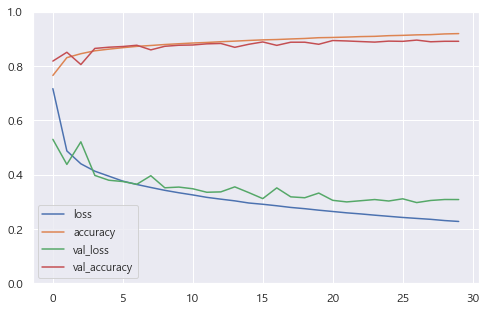

In [62]:
#Pandas를 이용한 학습 곡선 출력
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0 ,1)
plt.show()

- 모델 성능에 만족스럽지 않으면 처음으로 되돌아가서 하이퍼 파라미터를 튜닝해야 한다.

In [64]:
#evaluate() 메서드를 통한 테스트 세트로 모델을 평가하여 일반화 오차를 추정
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 478us/step - loss: 0.3401 - accuracy: 0.8796


[0.34010881185531616, 0.8795999884605408]

* 모델을 사용해 예측을 만들기

In [65]:
#0~9까지 클래스마다 각각의 확률을 모델이 추정
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [66]:
#가장 높은 확률을 가진 클래스에만 관심이 있다면 predict_classes()메서드를 사용
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [67]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

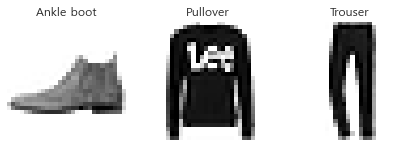

In [68]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

* 캘리포니아 주택 데이터셋을 로드하여 나누고 스케일 바꾸기
* 출력층이 활성화 함수가 없는 하나의 뉴런을 가지고, 손실 함수로 평균 제곱 오차를 사용한다
* 이 데이터셋에는 잡음이 많기 때문에 과대적합을 막는 용도로 뉴런 수가 적은 은닉층 하나만 사용한다.

In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [71]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 591us/step - loss: 0.7294 - val_loss: 15.9921
Epoch 2/20
363/363 [==============================] - 0s 406us/step - loss: 0.6180 - val_loss: 9.6009
Epoch 3/20
363/363 [==============================] - 0s 409us/step - loss: 0.5292 - val_loss: 0.4534
Epoch 4/20
363/363 [==============================] - 0s 414us/step - loss: 0.3957 - val_loss: 0.3639
Epoch 5/20
363/363 [==============================] - 0s 410us/step - loss: 0.3849 - val_loss: 0.3605
Epoch 6/20
363/363 [==============================] - 0s 420us/step - loss: 0.3776 - val_loss: 0.3825
Epoch 7/20
363/363 [==============================] - 0s 409us/step - loss: 0.3765 - val_loss: 0.3767
Epoch 8/20
363/363 [==============================] - 0s 423us/step - loss: 0.3689 - val_loss: 0.3864
Epoch 9/20
363/363 [==============================] - 0s 415us/step - loss: 0.3649 - val_loss: 0.4068
Epoch 10/20
363/363 [==============================] - 0s 415us/step - loss: 0.36

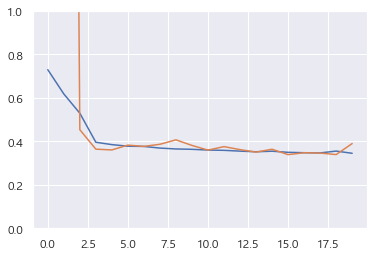

In [75]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [76]:
y_pred

array([[0.7122221],
       [1.668096 ],
       [4.128047 ]], dtype=float32)

* 시퀀셜 API는 사용하기 쉽지만 입력과 추력이 여러 개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야 할때가 있다.
* 이를 위해 케라스는 함수형(Functional) API를 제공한다.

## 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

* 2016년 헝쯔 청의 논문으로 소개된 순차적이지 않은 와이드 & 딥(Wide & Deep) 신경망
* 이 신경망은 입력의 일부 또는 전체가 출력층에 바로 연결된다.
* 이 구조는 신경망이 복잡한 패턴과 간단한 규칙을 모두 학습할 수 있다.
 1. Input 객체 만들기 / Input 객체는 shape, dtype을 포함하여 모델의 입력을 정의
 2. 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense층 생성 / 케라스에 층이 연결될 방법을 알려줌
 3. 두 번째 은닉층을 만들고 함수처럼 호출 / 첫 번째 층의 출력을 전달
 4. Concatenate층을 만들고 함수처럼 호출하여 두 번재 은닉층의 출력과 입력을 연결
 5. 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate층이 만든 결과를 사용해 호출
 6. 마지막으로 사용할 입력과 출력을 지정하여 케라스 Model을 만든다.

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs= [output])

In [81]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_7[0][0]         

In [82]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 670us/step - loss: 1.6920 - val_loss: 0.8798
Epoch 2/20
363/363 [==============================] - 0s 473us/step - loss: 0.6836 - val_loss: 0.6420
Epoch 3/20
363/363 [==============================] - 0s 457us/step - loss: 0.6265 - val_loss: 0.5891
Epoch 4/20
363/363 [==============================] - 0s 448us/step - loss: 0.5877 - val_loss: 0.5455
Epoch 5/20
363/363 [==============================] - 0s 453us/step - loss: 0.5566 - val_loss: 0.5409
Epoch 6/20
363/363 [==============================] - 0s 457us/step - loss: 0.5312 - val_loss: 0.4903
Epoch 7/20
363/363 [==============================] - 0s 456us/step - loss: 0.5108 - val_loss: 0.4728
Epoch 8/20
363/363 [==============================] - 0s 468us/step - loss: 0.4952 - val_loss: 0.5017
Epoch 9/20
363/363 [==============================] - 0s 454us/step - loss: 0.4802 - val_loss: 0.4511
Epoch 10/20
363/363 [==============================] - 0s 453us/step - loss: 0.468

* 일부 특성은 짧은 경로로 전달하고, 다른 특성들은 깊은 경로로 전달하고 싶다면?
 - 여러 입력을 사용한다.


In [83]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

 - 모델을 만들 때 inputs = [input_A, input_B]와 같이 지정
 - fit() 메서드를 호출할 때 하나의 입력 행렬 X_train가 아닌 입력마나 하나씩의 튜플(X_train_A, X_train_B)을 전달
 - X_valid / evaluate() / predict() 에도 동일하게 적용

In [84]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 665us/step - loss: 2.1094 - val_loss: 1.0289
Epoch 2/20
363/363 [==============================] - 0s 469us/step - loss: 0.7849 - val_loss: 0.6881
Epoch 3/20
363/363 [==============================] - 0s 466us/step - loss: 0.6517 - val_loss: 0.6039
Epoch 4/20
363/363 [==============================] - 0s 481us/step - loss: 0.5965 - val_loss: 0.5446
Epoch 5/20
363/363 [==============================] - 0s 514us/step - loss: 0.5595 - val_loss: 0.5129
Epoch 6/20
363/363 [==============================] - 0s 475us/step - loss: 0.5311 - val_loss: 0.4873
Epoch 7/20
363/363 [==============================] - 0s 456us/step - loss: 0.5084 - val_loss: 0.4673
Epoch 8/20
363/363 [==============================] - 0s 459us/step - loss: 0.4898 - val_loss: 0.4499
Epoch 9/20
363/363 [==============================] - 0s 453us/step - loss: 0.4748 - val_loss: 0.4373
Epoch 10/20
363/363 [==============================] - 0s 472us/step - loss: 0.464

* 여러 개의 출력이 필요한 경우
 - 회귀 작업과 분류 작업을 함께 하는 경우
 - 동일한 데이터에서 독립적인 여러 작업을 수행할 때
 - 규제 기법을 사용하는 경우

In [85]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [86]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

In [87]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 862us/step - loss: 0.9008 - main_output_loss: 0.7868 - aux_output_loss: 1.9275 - val_loss: 5.1884 - val_main_output_loss: 5.3132 - val_aux_output_loss: 4.0648
Epoch 2/20
363/363 [==============================] - 0s 555us/step - loss: 0.5814 - main_output_loss: 0.5197 - aux_output_loss: 1.1365 - val_loss: 1.0598 - val_main_output_loss: 1.0076 - val_aux_output_loss: 1.5302
Epoch 3/20
363/363 [==============================] - 0s 546us/step - loss: 0.4909 - main_output_loss: 0.4426 - aux_output_loss: 0.9259 - val_loss: 0.4891 - val_main_output_loss: 0.4450 - val_aux_output_loss: 0.8865
Epoch 4/20
363/363 [==============================] - 0s 539us/step - loss: 0.4596 - main_output_loss: 0.4216 - aux_output_loss: 0.8012 - val_loss: 0.4692 - val_main_output_loss: 0.4334 - val_aux_output_loss: 0.7914
Epoch 5/20
363/363 [==============================] - 0s 530us/step - loss: 0.4448 - main_output_loss: 0.4132 - aux_output_loss: 0.7292 

In [88]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 388us/step - loss: 0.3705 - main_output_loss: 0.3561 - aux_output_loss: 0.4995


## 10.2.5 서브클래싱 API로 동적 모델 만들기

* 위와 같은 정적 API들은 장점도 많지만, 반복문을 포함하거나 다양한 크기를 다루어야 하는 조건문을 가지는 등 여러 가지 동적인 구조를 필요로 할 때도 있다.
* 이런 경우 조금 더 명령형(Imperative) 프로그래밍 스타일이 필요할때 서브클래싱(Subclassing) API를 사용할 수 있다.
 - Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만든다.
 - 그다음 call()메서드 안에 수행하려는 연산을 기술한다.
 - 이전에 했던 것처럼 이 인스턴스를 사용해 모델 컴파일, 훈련, 평가, 예측을 수행할 수 있다.
 
 
* 유연성이 높아진 API라 할 수 있다.
* 유연성이 높아지면 그에 따른 비용이 발생한다. 모델 구조가 call() 메서드 안에 숨겨져 있기 때문에 케라스가 쉽게 이를 분석할 수 없다. 즉 모델을 저장 또는 복사할 수 없다.
* 케라스가 타입과 크기를 미리 확인할 수 없다.

In [89]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [90]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.4779 - output_1_loss: 2.2495 - output_2_loss: 4.5334 - val_loss: 2.3091 - val_output_1_loss: 2.1650 - val_output_2_loss: 3.6064
Epoch 2/10
363/363 [==============================] - 0s 541us/step - loss: 1.0367 - output_1_loss: 0.8524 - output_2_loss: 2.6948 - val_loss: 1.1543 - val_output_1_loss: 0.9436 - val_output_2_loss: 3.0508
Epoch 3/10
363/363 [==============================] - 0s 541us/step - loss: 0.8111 - output_1_loss: 0.6882 - output_2_loss: 1.9164 - val_loss: 0.8972 - val_output_1_loss: 0.6708 - val_output_2_loss: 2.9343
Epoch 4/10
363/363 [==============================] - 0s 541us/step - loss: 0.7203 - output_1_loss: 0.6216 - output_2_loss: 1.6083 - val_loss: 0.8175 - val_output_1_loss: 0.5908 - val_output_2_loss: 2.8576
Epoch 5/10
363/363 [==============================] - 0s 533us/step - loss: 0.6718 - output_1_loss: 0.5819 - output_2_loss: 1.4805 - val_loss: 0.7650 - val_output_1_loss: 0.5440 

## 10.2.6 모델 저장과 복원

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 626us/step - loss: 1.6890 - val_loss: 0.9207
Epoch 2/10
363/363 [==============================] - 0s 441us/step - loss: 0.7894 - val_loss: 0.7181
Epoch 3/10
363/363 [==============================] - 0s 440us/step - loss: 0.6738 - val_loss: 0.6226
Epoch 4/10
363/363 [==============================] - 0s 442us/step - loss: 0.6047 - val_loss: 0.5419
Epoch 5/10
363/363 [==============================] - 0s 437us/step - loss: 0.5539 - val_loss: 0.5061
Epoch 6/10
363/363 [==============================] - 0s 442us/step - loss: 0.5149 - val_loss: 0.4734
Epoch 7/10
363/363 [==============================] - 0s 453us/step - loss: 0.4849 - val_loss: 0.4571
Epoch 8/10
363/363 [==============================] - 0s 462us/step - loss: 0.4620 - val_loss: 0.4476
Epoch 9/10
363/363 [==============================] - 0s 470us/step - loss: 0.4451 - val_loss: 0.4324
Epoch 10/10
162/162 [==============================] - 0s 296us/step - loss: 0.423

In [92]:
model.save("my_keras_model.h5")

In [93]:
model = keras.models.load_model("my_keras_model.h5")

In [94]:
model.predict(X_new)

array([[0.94346404],
       [1.6388651 ],
       [3.440311  ]], dtype=float32)

## 10.2.7 콜백 사용하기

* 훈련 도중 일정 간격으로 체크포인트를 저장할 수 있다.
* fit()메서드의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있다.
* 에포크의 시작이나 끝, 각 배치 처리 전후에 호출할 수도 있다.

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [98]:
#ModelCheckpoint()는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장
#save_best_only = True로 체크포인트 지정 / 최상의 점수를 낸 모델 저장
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 637us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 456us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 459us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 453us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 451us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 443us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 453us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 464us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 453us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 289us/step - loss: 0.438

In [99]:
#EarlyStopping 콜백을 통한 조기 종료
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 643us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 440us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 448us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 449us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 459us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 457us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 461us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 451us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 459us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 459us/step - l

In [100]:
#더 많은 제어를 위해 사용자 정의 콜백을 만들 수 있다.
#예시로 훈련하는 동안 검증 손실과 훈련 손실의 비율을 출력
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [101]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

294/363 [=======================>......] - ETA: 0s - loss: 0.3328
val/train: 1.08
363/363 [==============================] - 0s 520us/step - loss: 0.3302 - val_loss: 0.3556


## 10.2.8 텐서보드를 사용해 시각화하기
* 훈련하는 동안 학습 곡선을 그리거나 여러 실행 간의 학습 곡선을 비교하고 계산 그래프 시각화와 훈련 통계 분석을 수행할 수 있다.
* 모델이 생성한 이미지를 확인하거나 3D에 투영된 복잡한 다차원 데이터를 시각화하고 자동으로 클러스터링을 해주는 등 많은 기능을 제공한다.
* 텐서보드를 사용하려면 프로그램을 수정하여 이벤트 파일이라는 특별한 이진 로그 파일에 시각화하려는 데이터를 출력해야 한다. 각각의 이진 데이터 레코드를 서머리(Summary)라고 부른다.

In [103]:
#텐서보드 로그를 위해 사용할 루트 로그 디렉토리 정의
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_10_10-22_09_42'

In [104]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [106]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 7.8215WARNING:tensorflow:From C:\Users\uoo1325\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 916us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 479us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 470us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 489us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 624us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 486us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [===================

In [110]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1588), started 0:01:50 ago. (Use '!kill 1588' to kill it.)

# 10.3 신경망 하이퍼 파라미터 튜닝하기

* 아주 복잡한 네트워크 구조에서뿐만 아니라 간단한 다층 퍼셉트론에서도 층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화 전략 등 많은 것을 바꿀 수 있다.
* 문제 해결에서 최적인지 확인하기 위해서는 많은 하이퍼 파라미터 조합을 시도해보고, 검증 세트에서 가장 좋은 점수를 내는지 확인하는 것이다.
* GridSearchCV 나 RandomizedSerachCV 를 사용해 하이퍼파라미터 공간을 탐색할 수 있다.

In [118]:
#입력 크기, 은닉층 개수, 뉴런 개수로 단변량 회귀를 위한 간단한 Sequentiaol 모델
#회귀 추정기처럼 이 객체를 사용할 수 있다 : fit()을 통한 훈련 / score()로 평가 / predict()로 예측
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

In [119]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [120]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 618us/step - loss: 1.1199 - val_loss: 10.5492
Epoch 2/100
363/363 [==============================] - 0s 437us/step - loss: 0.6678 - val_loss: 0.5672
Epoch 3/100
363/363 [==============================] - 0s 448us/step - loss: 0.5200 - val_loss: 0.4875
Epoch 4/100
363/363 [==============================] - 0s 426us/step - loss: 0.4855 - val_loss: 0.4654
Epoch 5/100
363/363 [==============================] - 0s 442us/step - loss: 0.4632 - val_loss: 0.4563
Epoch 6/100
363/363 [==============================] - 0s 464us/step - loss: 0.4478 - val_loss: 0.4691
Epoch 7/100
363/363 [==============================] - 0s 434us/step - loss: 0.4367 - val_loss: 0.4507
Epoch 8/100
363/363 [==============================] - 0s 448us/step - loss: 0.4288 - val_loss: 0.4346
Epoch 9/100
363/363 [==============================] - 0s 502us/step - loss: 0.4220 - val_loss: 0.4450
Epoch 10/100
363/363 [==============================] - 0s 438us/step - 

* 수백 개의 모델을 훈련하고 검증 세트에서 최상의 모델을 선택해야 한다.
* 하이퍼 파라미터가 많으므로 그리드 탐색보다 랜덤 탐색을 사용하는 것이 좋다.
* 은닉층 개수, 뉴런 개수, 학습률을 사용해 하이퍼 파라미터 탐색을 수행

In [123]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate" : reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_train, y_train, epochs = 100,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
242/242 [==============================] - 0s 698us/step - loss: 3.8537 - val_loss: 1.5221
Epoch 2/100
242/242 [==============================] - 0s 462us/step - loss: 1.1080 - val_loss: 0.7390
Epoch 3/100
242/242 [==============================] - 0s 453us/step - loss: 0.6773 - val_loss: 0.6179
Epoch 4/100
242/242 [==============================] - 0s 449us/step - loss: 0.5898 - val_loss: 0.5781
Epoch 5/100
242/242 [==============================] - 0s 453us/step - loss: 0.5680 - val_loss: 0.5662
Epoch 6/100
242/242 [==============================] - 0s 457us/step - loss: 0.5576 - val_loss: 0.7680
Epoch 7/100
242/242 [==============================] - 0s 474us/step - loss: 0.5557 - val_loss: 0.7141
Epoch 8/100
242/242 [==============================] - 0s 482us/step - loss: 0.5519 - val_loss: 0.7329
Epoch 9/100
242/242 [==============================] - 0s 466us/step - loss: 0.5511 - val_loss: 0.5563
Epoch 10/100
242/242 [==============================] - 0s 457us/step - l

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000218972B3460>, as the constructor either does not set or modifies parameter learning_rate

In [125]:
#최상의 하이퍼 파라미터와 훈련된 케라스 모델
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [126]:
rnd_search_cv.best_score_

-0.3551027576128642

In [132]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [133]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [134]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 486us/step - loss: 0.3727


0.37267106771469116

* 하이퍼 파라미터 최적화에 사용할 수 있는 파이썬 라이브러리
- Hyperopt : 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 잘 알려진 라이브러리
- Hyperas, kopt, Talos : 케라스 모델을 위한 하이퍼 파라미터 최적화 라이브러리
- Scikit-Optimize(skopt) : 범용 최적화 라이브러리. BayeSearchCV 클래스는 GridSearchCV와 비슷한 인터페이스 사용하여 베이즈 최적화를 수행
- Spearmint : 베이즈 최적화 라이브러리
- Hyperband : 리샤 리 등의 최근  Hyperband 논문을 기반으로 구축된 빠른 하이퍼 파라미터 튜닝 라이브러리
- Sklearn-Deap : GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘 기반의 하이퍼 파라미터 최적화 라이브러리

##  10.3.1 은닉층 개수

* 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 파라미터 효율성(Parameter Efficiency)가 더 좋다
* 아래쪽 은닉층은 저수준의 구조를 모델링하고, 중간 은닉층은 저수준의 구조를 연결해 중간 수준의 구조를 모델링한다. 그리고 가장 위쪽 은닉층과 출력층은 중간 수준의 구조를 연결하고 고수준의 구조를 모델링한다.
* 전이학습(Transfer Learning) : 새로운 신경망에서 처음 몇 개 층의 가중치와 편향을 난수로 초기화하는 대신 첫 번째 신경망의 층에 있는 가중치와 편향값으로 초기화하는 방식

## 10.3.2 은닉층의 뉴런 개수

* 은닉층의 구성 방식은 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성한다.
* 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문
* 층의 개수와 마찬가지로 네트워크가 과대적합이 시작되기 전까지 점진적으로 뉴런 수를 늘릴 수 있다.
* 하지만 실전에서는 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 그런 다음 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 더 효과적이고 간단하다.
* 한 층의 뉴런 수가 너무 적으면 입력에 있는 유용한 정보를 모두 유지하기 위한 충분한 표현 능력을 가지지 못한다.


## 10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

* 학습률
 - 일반적으로 최적의 학습률은 최대 학습률의 절반 정도
 - 좋은 학습률을 찾는 한 가지 방법은 매우 낮은 학습률에서 시작해서 점진적으로 매우 큰 학습률까지 수백번 반복하여 모델을 훈련하는 것
 
* 옵티마이저
 - 고전적인 평범한 미니배치 경사 하강법보다 더 좋은 옵티마이저를 선택하는 것도 중요하다
 
* 배치 크기
 - 큰 배치 크기를 사용하는 것의 주요 장점은 GPU와 같은 하드웨어 가속기를 효율적으로 활용할 수 있다.
 - 실전에서 큰 배치 크기를 사용하면 특히 훈련 초기에 종종 불안정하게 훈련된다.
 - 큰 배치 크기는 일반화 성능에 영향을 미치지 않고, 훈련 시간을 매우 단축시킨다.
 - 훈련이 불안정하거나 최종 성능이 만족스럽지 못하면 작은 배치 크기를 사용
 
* 활성화 함수
 - 일반적으로 ReLU 활성화 함수가 모든 은닉층에 좋은 기본값
 - 출력층의 활성화 함수는 수행하는 작업에 따라 달라진다.

* 반복 횟수
 - 대부분의 경우 훈련 반복 횟수는 튜닝할 필요가 없다. 대신 조기 종료를 사용한다.